In [1]:
# Importing Common Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Data
cx_analysis = pd.read_csv('marketing_campaign.csv', sep = '\t')
cx_analysis.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
cx_analysis.shape

(2240, 29)

#### *Dataset Contain 29 Columns and 2440 Rows* 

In [5]:
cx_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
cx_analysis.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### *Income Columns has 24 null values*

In [8]:
cx_analysis['Income'].isnull().sum()

24

C:\Users\MOHIT\AppData\Local\Temp\ipykernel_1256\3532360386.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cx_analysis['Income'])


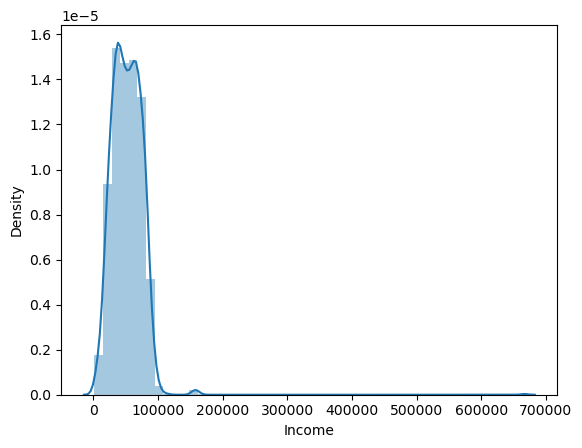

In [9]:
sns.distplot(cx_analysis['Income'])
plt.show()

### we can see distribution of data is left skwed

## Handling Null Values by Filling Median on it *'.median()'*

In [12]:
cx_analysis['Income'].fillna(cx_analysis['Income'].median(), inplace=True)

### Checking for Duplicate Value in Dataset

In [14]:
cx_analysis.duplicated().sum()

0

In [15]:
cx_analysis[cx_analysis.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


#### No Duplicated Data Found in th Datset

## Checking for Unique Values in each columns

In [18]:
cx_analysis.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [19]:
cx_analysis.sample(10).T

,803,1828,1576,1647,2206,0,887,1408,1257,852
ID,9930,4687,2130,7005,1092,5524,8086,8783,810,4856
Year_Birth,1944,1958,1982,1981,1980,1957,1959,1950,1975,1957
Education,PhD,Master,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation,2n Cycle
Marital_Status,Single,Married,Together,Single,Married,Single,Married,Married,Married,Married
Income,82716.0,80739.0,45203.0,58684.0,61014.0,58138.0,42243.0,57045.0,74190.0,82347.0
Kidhome,0,0,2,0,0,0,1,0,0,0
Teenhome,0,0,0,0,1,0,1,1,1,0
Dt_Customer,05-11-2013,23-05-2013,23-03-2014,16-06-2014,11-08-2012,04-09-2012,11-12-2013,08-09-2012,12-05-2014,06-11-2012
Recency,8,92,4,71,17,58,34,40,49,38
MntWines,606,674,35,479,269,635,48,296,151,556


### Z_CostContact and Z_Revenue columns has only 1 value in it, it's not so important so dropping it

In [21]:
cx_analysis = cx_analysis.drop(columns =['Z_CostContact' , 'Z_Revenue'], axis=1)

### Correcting The DataTypey

#### Converting Year_Birth and Dt_Customer to datetime format using datetime library

In [24]:
cx_analysis['Year_Birth'] = pd.to_datetime(cx_analysis['Year_Birth'], format= '%Y')
cx_analysis['Dt_Customer'] = pd.to_datetime(cx_analysis['Dt_Customer'], format= '%d-%m-%Y')

In [25]:
cx_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

###  Checking Statical Distribution of Data

In [27]:
cx_analysis.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968-10-21 16:33:51.428571432,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,0.000000,1893-01-01 00:00:00,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959-01-01 00:00:00,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970-01-01 00:00:00,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977-01-01 00:00:00,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996-01-01 00:00:00,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,NaN,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


## Standardising Education and  Marital_Statu Columnss

In [29]:
cx_analysis['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [30]:
# Defining Function for Standardizing Data on Education Column
def standardize_education(education):
    education = str(education).strip().lower()
    if "phd" in education:
        return "PhD"
    elif "master" in education:
        return "Master"
    elif "graduation" in education or "bachelor" in education:
        return "Graduation"
    elif "2n cycle" in education or "high school" in education:
        return "High School"
    elif "basic" in education:
        return "Basic"
    else:
        return "Other"


In [31]:
cx_analysis['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [32]:
# Defining Function for Standardizing Data on Martial Status Column
def standardize_marital_status(status):
    status = str(status).strip().lower()
    if status in ["Single", "Alone", "YOLO", "Absurd"]:
        return "Single"
    elif status in ["Married", "Together"]:
        return "Married"
    elif status == "Divorced":
        return "Divorced"
    elif status =="Widow":
        return "Widowed"
    else:
        return "Other"


### Applying Standardizing On Dataset

In [35]:
cx_analysis['Standardise_Education'] = cx_analysis['Education'].apply(standardize_education)
cx_analysis['Standardise_Marital_Status'] = cx_analysis['Education'].apply(standardize_marital_status)

In [37]:
cx_analysis.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Standardise_Education,Standardise_Marital_Status
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,Graduation,Other
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,Graduation,Other
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,Graduation,Other
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,Graduation,Other
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,PhD,Other


In [39]:
cx_analysis['Standardise_Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', 'High School'],
      dtype=object)

In [41]:
cx_analysis['Standardise_Marital_Status'].unique()

array(['Other'], dtype=object)